In [8]:
import tensorflow as tf
import numpy as np

In [9]:
#datos de entrada y resultados
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahren = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [10]:
#diseñamos el modelo de red neuronal
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

c:\Users\juanp\Desktop\Python\.conda\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
#propiedades para mejorar entrenamiento
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error'
)

In [17]:
#entrenamiento
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahren, epochs=500, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


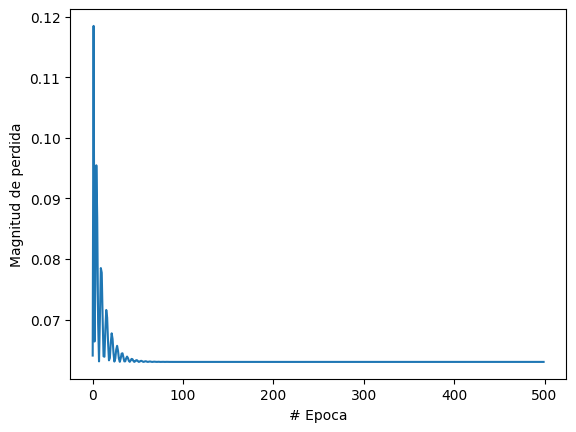

In [18]:
#Grafico de funcion de perdida
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])
plt.show()

In [28]:
print("hagamos una prediccion: ")
dato_predict = np.array([100.0])
resultado = modelo.predict(dato_predict)
print("La prediccion es que 100°C son: ", resultado,"°F")

hagamos una prediccion: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
La prediccion es que 100°C son:  [[211.74742]] °F


In [29]:
print("variables internas del modelo")
print(capa.get_weights())

variables internas del modelo
[array([[1.797949]], dtype=float32), array([31.952526], dtype=float32)]


# Mas capas y neuronas, capaz intermedias

In [30]:
#diseñamos el modelo de red neuronal
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

c:\Users\juanp\Desktop\Python\.conda\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
#propiedades para mejorar entrenamiento
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [32]:
#entrenamiento
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahren, epochs=500, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


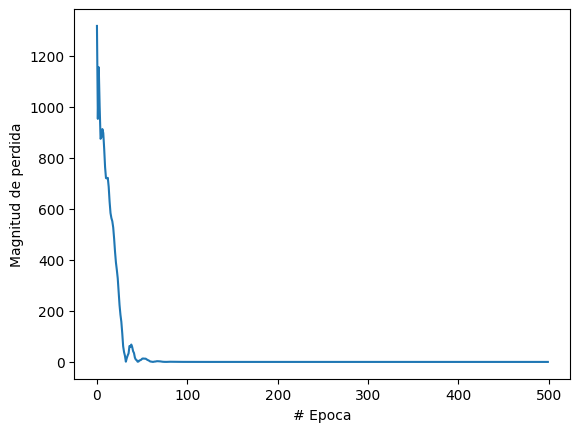

In [33]:
#Grafico de funcion de perdida
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])
plt.show()

In [34]:
print("hagamos una prediccion: ")
dato_predict = np.array([100.0])
resultado = modelo.predict(dato_predict)
print("La prediccion es que 100°C son: ", resultado,"°F")

hagamos una prediccion: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
La prediccion es que 100°C son:  [[211.74748]] °F


In [38]:
print("variables internas del modelo")
print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

variables internas del modelo
[array([[1.797949]], dtype=float32), array([31.952526], dtype=float32)]
[array([[ 0.15449527,  0.6674309 , -0.78824264]], dtype=float32), array([-3.2950625,  3.3990643, -3.4583976], dtype=float32)]
[array([[-0.2459568 , -1.6358769 ,  0.8869985 ],
       [-0.47790763,  0.8771282 , -0.02630117],
       [-0.32322374, -0.9309852 ,  0.44063145]], dtype=float32), array([-2.290336 ,  3.467895 , -3.4391024], dtype=float32)]
[array([[-0.16282773],
       [ 1.532313  ],
       [-0.6454181 ]], dtype=float32), array([3.4061682], dtype=float32)]


no tiene caso intentar entenderlos simplemente fue la mejor combinación que encontró el proceso de optimización para llegar al resultado de la manera más acertada esto pasa a veces con grandes
redes neuronales que usan miles de neuronas y millones de conexiones no podemos saber exactamente por qué considera que cierta combinación de pesos y sesgos es el adecuado 